In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing  import LabelEncoder,StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [20]:
data = pd.read_csv("C:/Users/JDPK/Downloads/agriculture_dataset.csv")

In [21]:
data.shape

(50, 10)

In [22]:
data.isnull().sum()

Farm_ID                      0
Crop_Type                    0
Farm_Area(acres)             0
Irrigation_Type              0
Fertilizer_Used(tons)        0
Pesticide_Used(kg)           0
Yield(tons)                  0
Soil_Type                    0
Season                       0
Water_Usage(cubic meters)    0
dtype: int64

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Farm_ID                    50 non-null     object 
 1   Crop_Type                  50 non-null     object 
 2   Farm_Area(acres)           50 non-null     float64
 3   Irrigation_Type            50 non-null     object 
 4   Fertilizer_Used(tons)      50 non-null     float64
 5   Pesticide_Used(kg)         50 non-null     float64
 6   Yield(tons)                50 non-null     float64
 7   Soil_Type                  50 non-null     object 
 8   Season                     50 non-null     object 
 9   Water_Usage(cubic meters)  50 non-null     float64
dtypes: float64(5), object(5)
memory usage: 4.0+ KB


In [24]:
data.describe()

,Farm_Area(acres),Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters)
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,254.963800,4.905400,2.398000,27.059200,56724.295600
std,139.417782,2.732689,1.438613,13.345789,27264.992053
min,12.500000,0.500000,0.140000,3.860000,5869.750000
25%,135.710000,2.437500,0.972500,16.190000,37818.152500
50%,281.980000,5.045000,2.330000,28.970000,54097.075000
75%,368.107500,6.885000,3.417500,37.860000,82240.032500
max,483.880000,9.960000,4.990000,48.020000,94754.730000


In [25]:
data['Crop_Type'].value_counts()

Crop_Type
Cotton       7
Barley       7
Tomato       6
Rice         5
Soybean      5
Sugarcane    5
Carrot       4
Wheat        4
Potato       4
Maize        3
Name: count, dtype: int64

In [26]:
data['Irrigation_Type'].value_counts()

Irrigation_Type
Drip         15
Flood        13
Sprinkler     9
Rain-fed      7
Manual        6
Name: count, dtype: int64

In [27]:
data['Soil_Type'].value_counts()

Soil_Type
Clay     14
Loamy    11
Sandy    11
Silty    10
Peaty     4
Name: count, dtype: int64

In [28]:
data['Season'].value_counts()

Season
Zaid      23
Kharif    16
Rabi      11
Name: count, dtype: int64

In [29]:
data = data.drop(columns=['Farm_ID'])

In [30]:
num_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = data.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
print(num_cols)
print(cat_cols)

['Farm_Area(acres)', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Yield(tons)', 'Water_Usage(cubic meters)']
['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season']


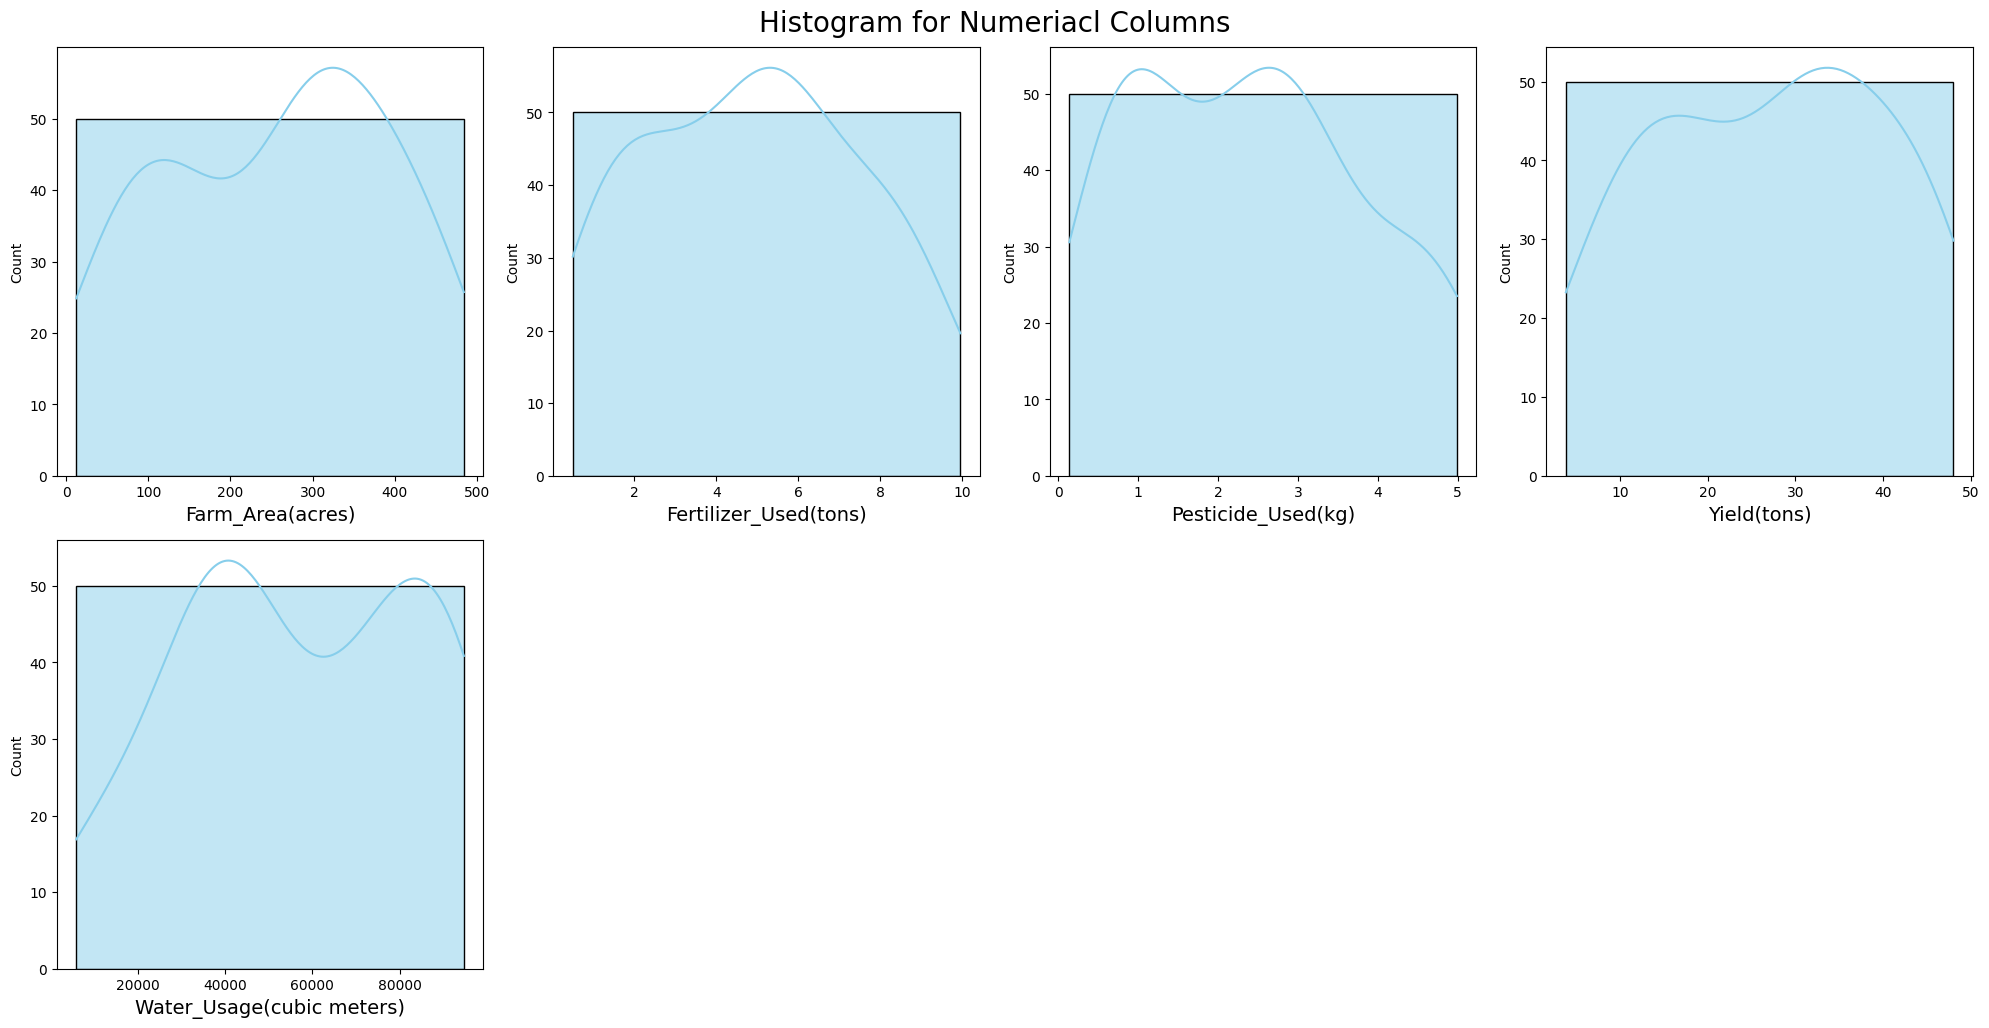

In [31]:
plt.figure(figsize=(20,20))
pt = 1
for column in num_cols:
    ax = plt.subplot(4, 4, pt)
    sns.histplot(data[column], ax=ax, bins=True, kde=True, color='skyblue')
    ax.set_xlabel(column, fontsize=14)
    pt+=1

plt.suptitle("Histogram for Numeriacl Columns", fontsize=20, ha = 'center')
plt.tight_layout(rect=[0,0,1,0.99])
plt.show()

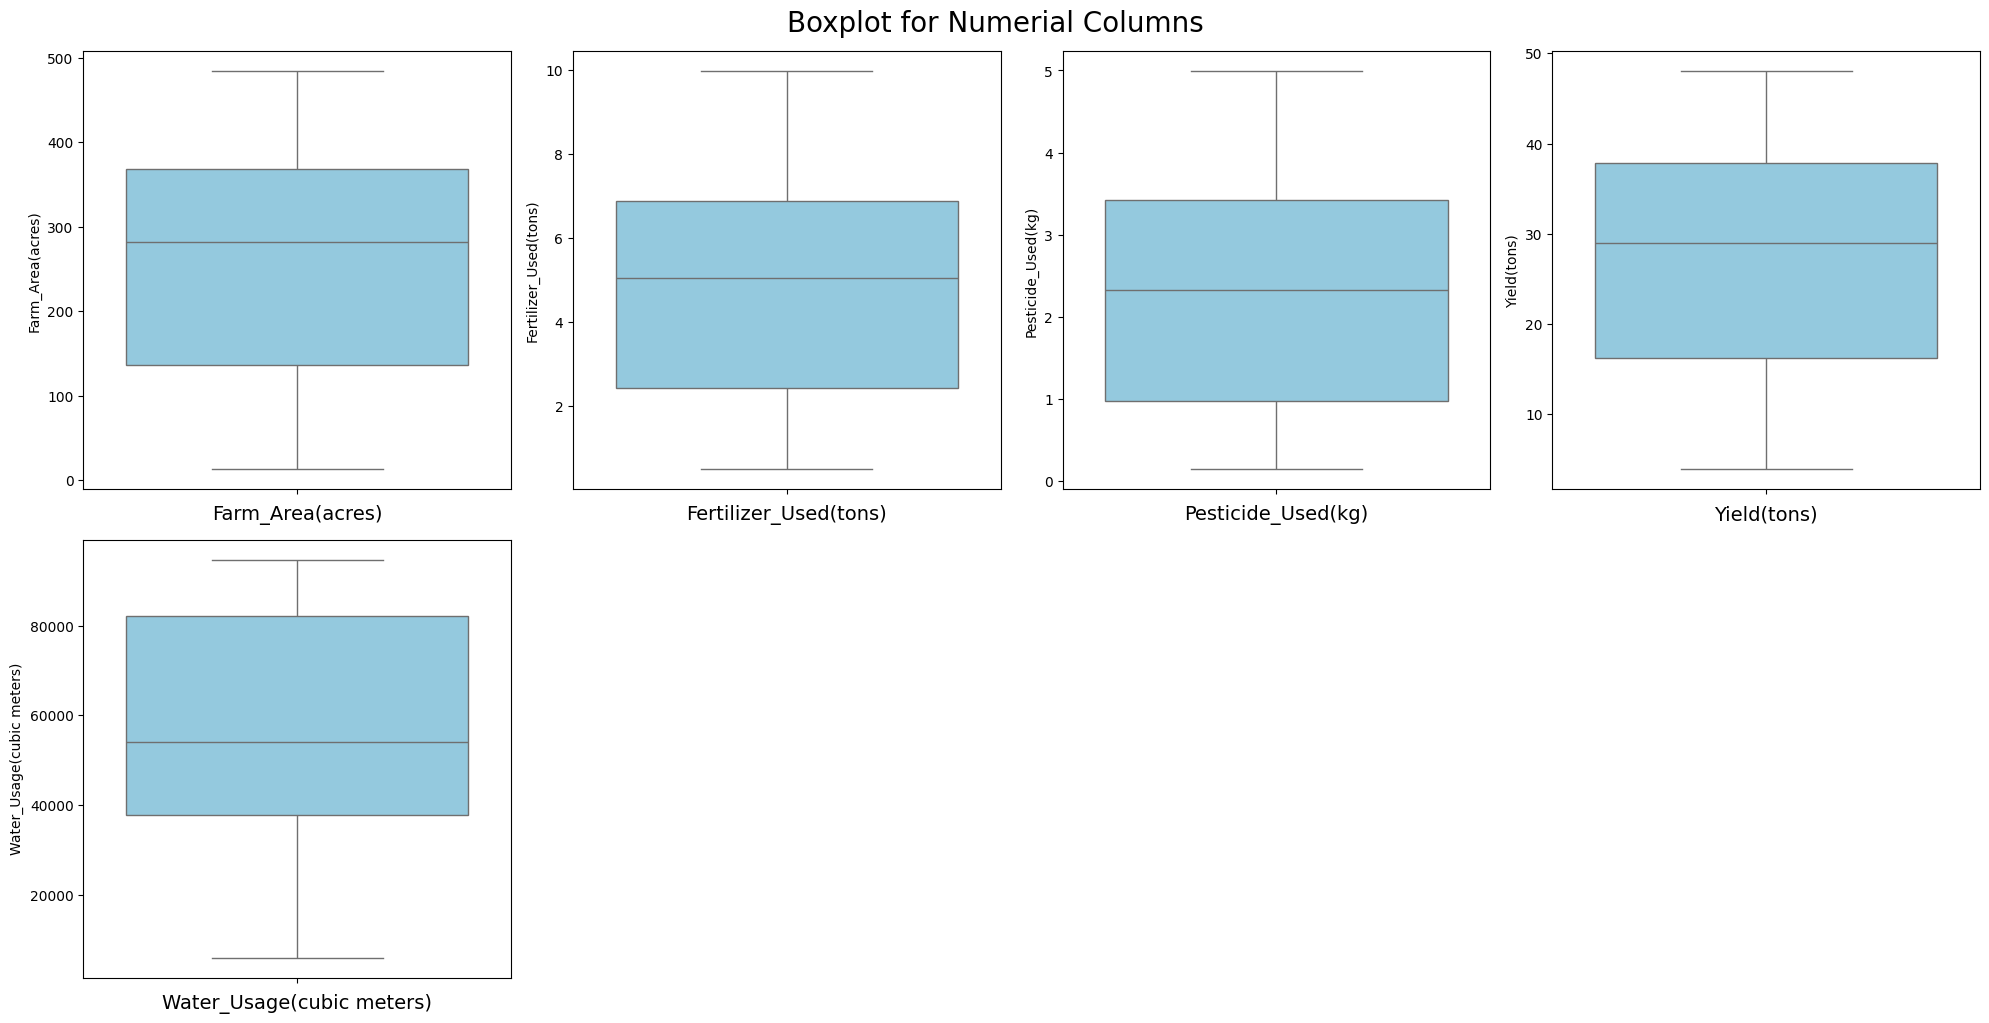

In [32]:
plt.figure(figsize=(20,20))
pt=1
for column in num_cols:
    ax = plt.subplot(4,4,pt)
    sns.boxplot(data[column], ax=ax, color='skyblue')
    ax.set_xlabel(column, fontsize=14)
    pt+=1

plt.suptitle("Boxplot for Numerial Columns", fontsize=20, ha='center')
plt.tight_layout(rect=[0,0,1,0.99])
plt.show()

In [33]:
for column in num_cols:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    print('Outlier in: ', column)
    print(outliers[[column]])
    print('Number of outliers: ',len(outliers), '\n')

Outlier in:  Farm_Area(acres)
Empty DataFrame
Columns: [Farm_Area(acres)]
Index: []
Number of outliers:  0 

Outlier in:  Fertilizer_Used(tons)
Empty DataFrame
Columns: [Fertilizer_Used(tons)]
Index: []
Number of outliers:  0 

Outlier in:  Pesticide_Used(kg)
Empty DataFrame
Columns: [Pesticide_Used(kg)]
Index: []
Number of outliers:  0 

Outlier in:  Yield(tons)
Empty DataFrame
Columns: [Yield(tons)]
Index: []
Number of outliers:  0 

Outlier in:  Water_Usage(cubic meters)
Empty DataFrame
Columns: [Water_Usage(cubic meters)]
Index: []
Number of outliers:  0 



In [34]:
# One-Hot Encoding for non-ordinal features
# data = pd.get_dummies(data, columns=['Crop_Type', 'Irrigation_Type', 'Soil_Type', 'Season'], drop_first=True)

# Initialize LabelEncoders
# Reason: We use different LabelEncoders for each column to ensure that each categorical feature has its own independent encoding and mapping.
crop_encoder = LabelEncoder()
irrigation_encoder = LabelEncoder()
soil_encoder = LabelEncoder()
season_encoder = LabelEncoder()

# Fit and transform categorical columns
data['Crop_Type'] = crop_encoder.fit_transform(data['Crop_Type'])
data['Irrigation_Type'] = irrigation_encoder.fit_transform(data['Irrigation_Type'])
data['Soil_Type'] = soil_encoder.fit_transform(data['Soil_Type'])
data['Season'] = season_encoder.fit_transform(data['Season'])

In [35]:
len(data.columns)

9

In [36]:
# Standardization (Z-score scaling)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[num_cols])

# Convert them back to DataFrame:
data_scaled_standard = pd.DataFrame(data_scaled, columns=num_cols)

In [37]:
data_scaled_standard.shape

(50, 5)

In [38]:
data_scaled_standard.head()

,Farm_Area(acres),Fertilizer_Used(tons),Pesticide_Used(kg),Yield(tons),Water_Usage(cubic meters)
0,0.539328,1.195687,-0.132008,-0.955156,0.738169
1,-1.712068,-0.050051,1.377660,1.199759,0.444639
2,0.370001,-0.737610,-1.290590,0.482967,0.697058
3,0.907472,-0.586051,1.370638,0.531409,-0.419513
4,-0.865141,1.265921,1.461920,1.227764,1.370621


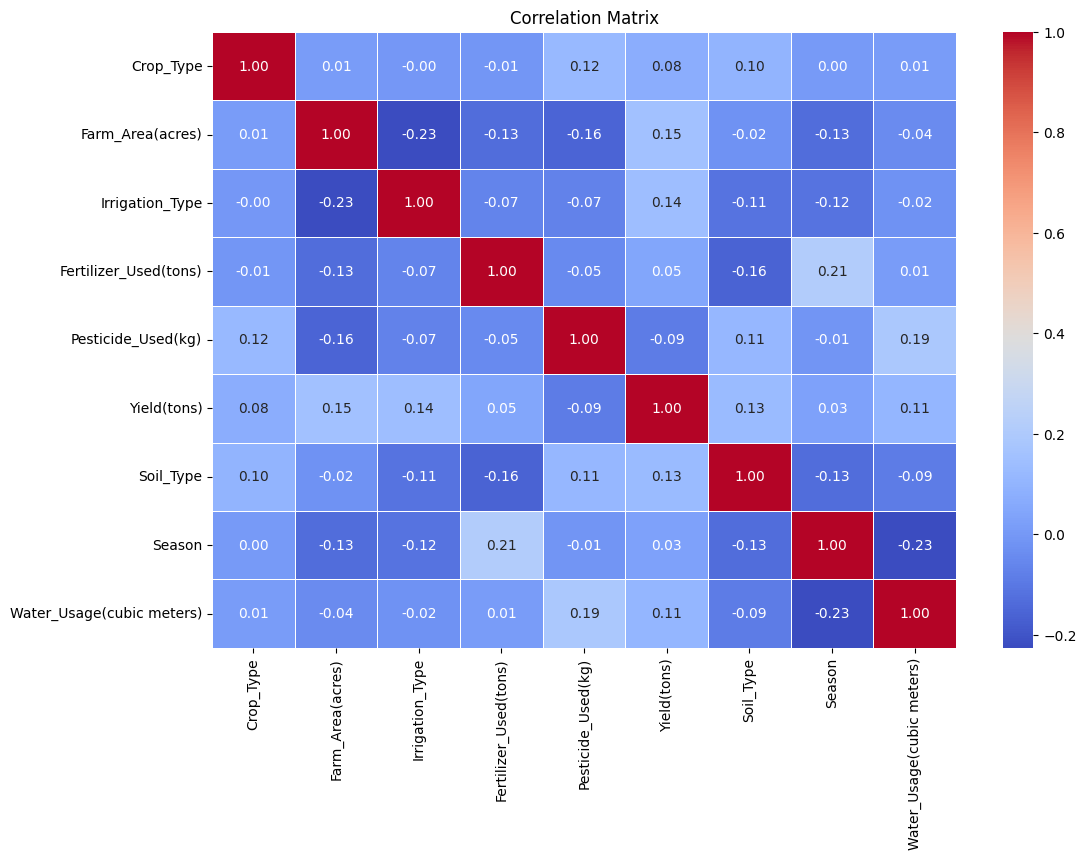

In [39]:
# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap to visualize the correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

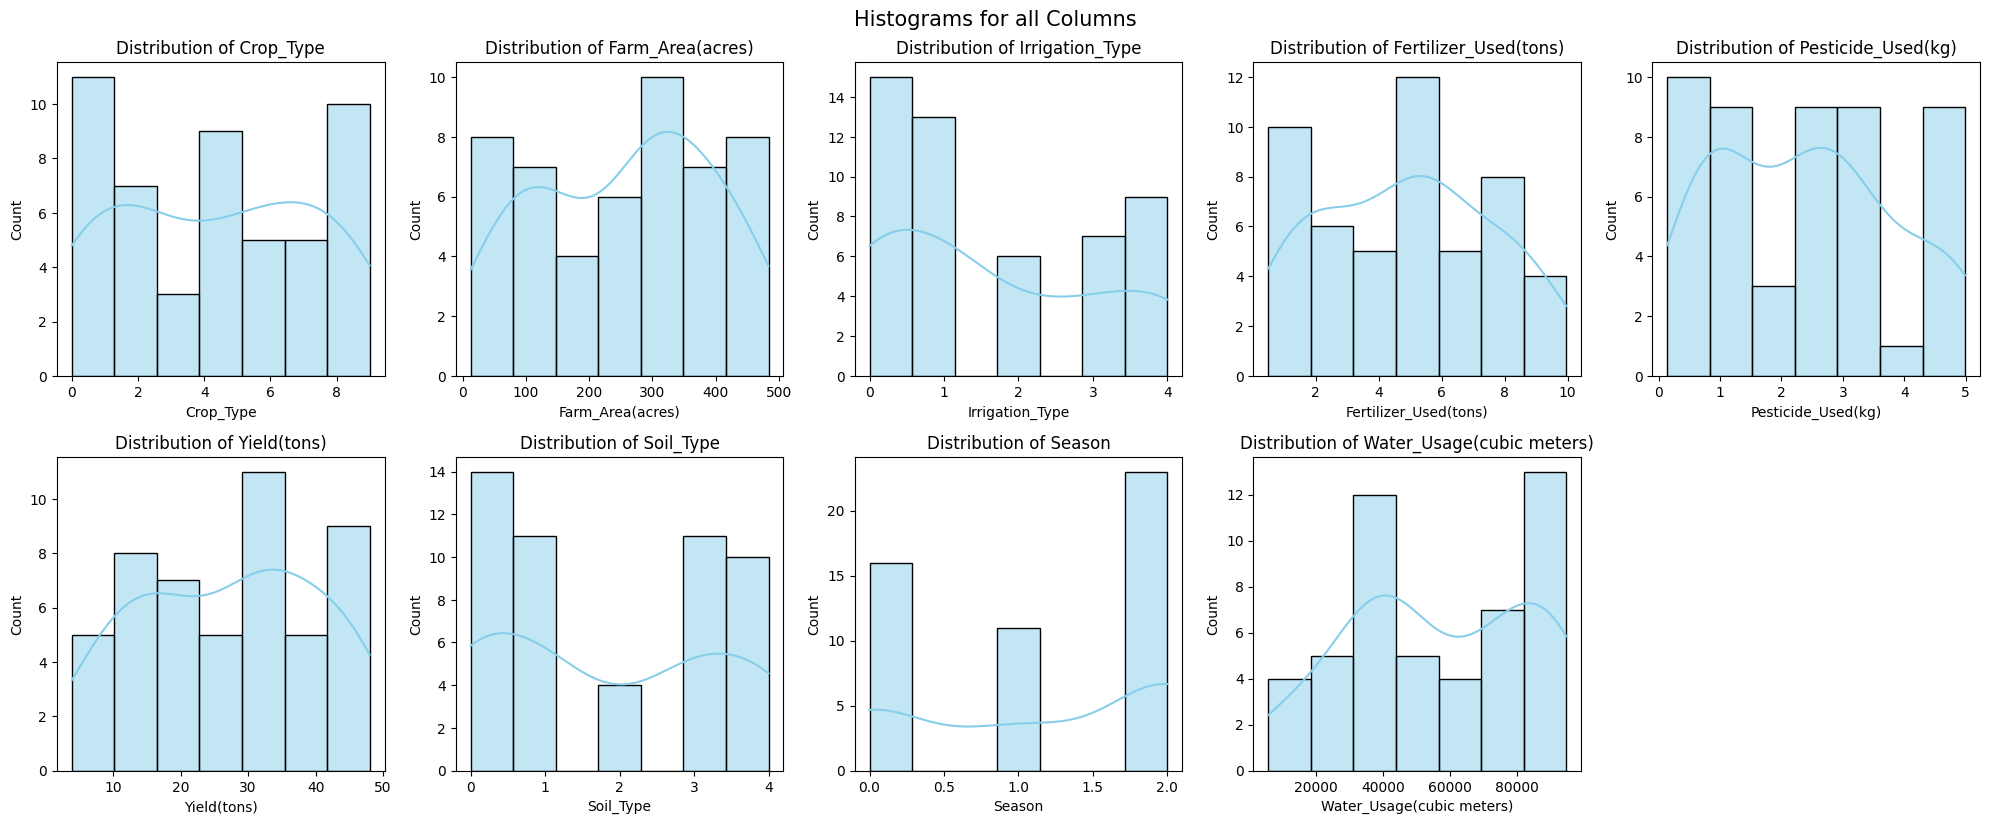

In [40]:
# Set up the size of the plots
plt.figure(figsize=(20,20))

# Loop through each feature and create a distribution plot
for i, column in enumerate(data.columns):
    plt.subplot(5, 5, i+1)  # Adjust the number of rows and columns based on the number of features
    sns.histplot(data[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
plt.suptitle('Histograms for all Columns', fontsize=15, ha='center')
plt.tight_layout(rect=[0, 0, 1, 0.99])
plt.show()

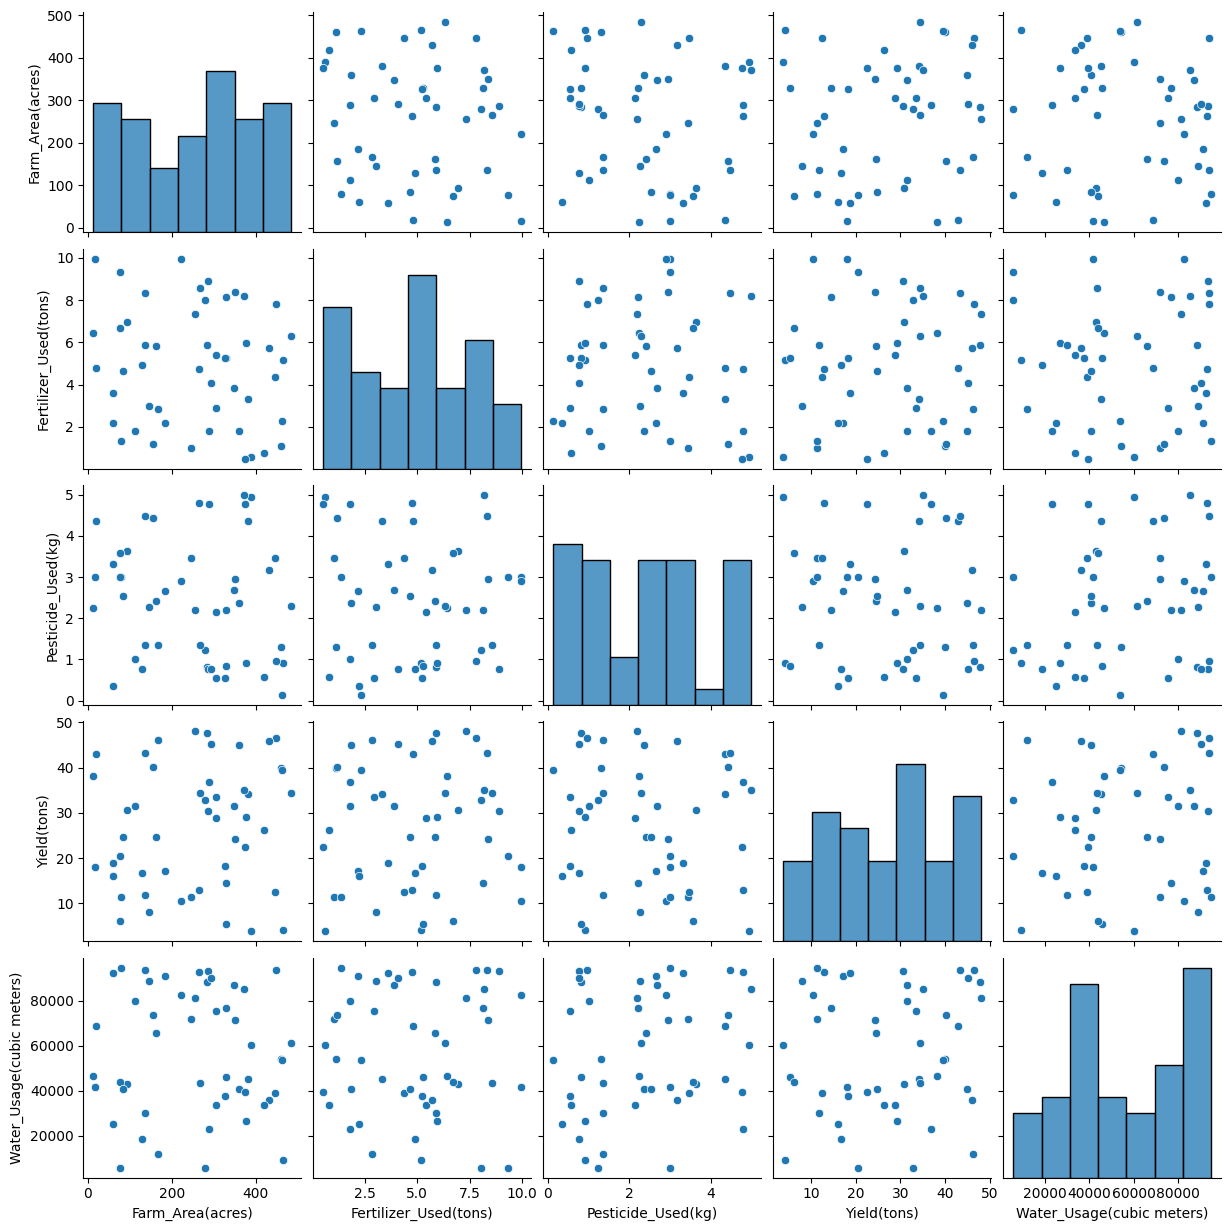

In [41]:
sns.pairplot(data[num_cols ])

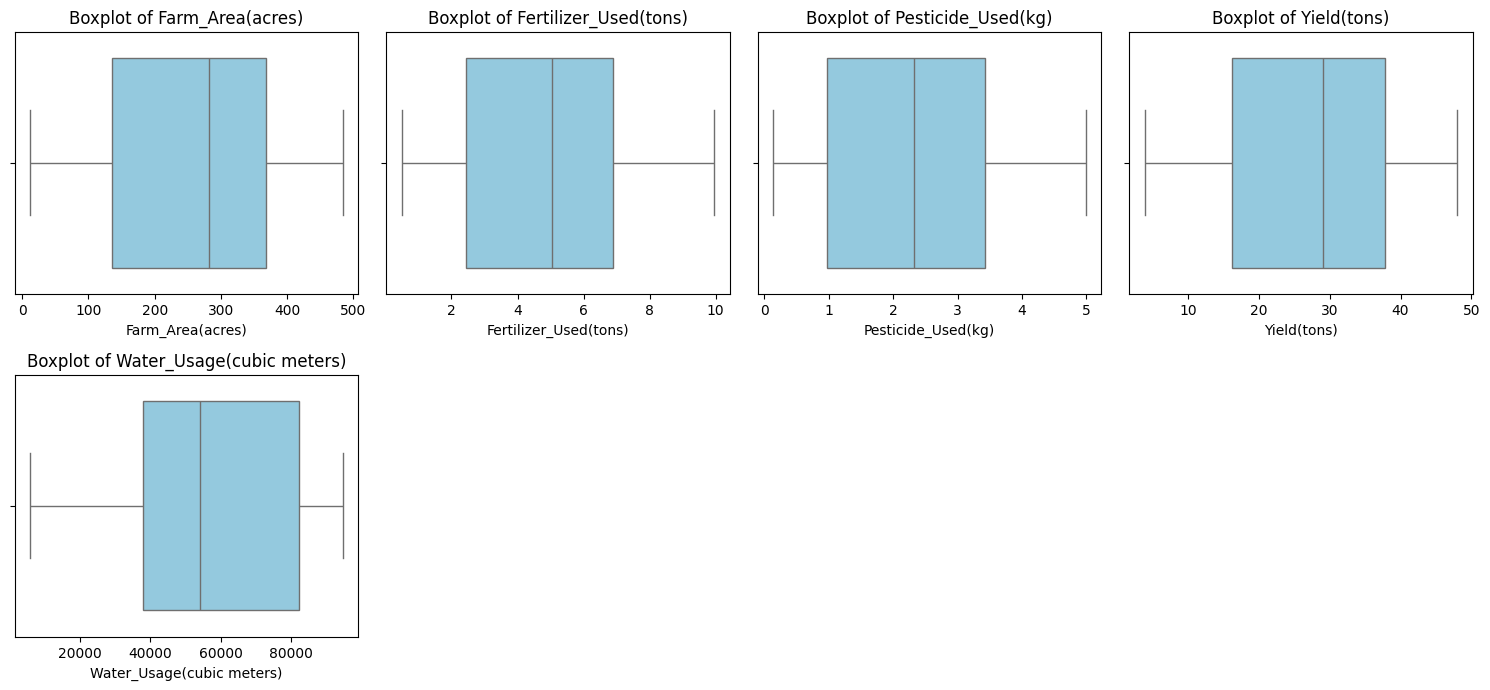

In [42]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(num_cols):
    plt.subplot(3, 4, i+1)  # Adjust the number of rows and columns
    sns.boxplot(x=data[column], color='skyblue')
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()

plt.show()

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [44]:
X = data.drop(columns=['Yield(tons)'])
y = data['Yield(tons)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X.shape

(50, 8)

In [46]:
# Initialize Models
ln_clf = LinearRegression()
rf_clf = RandomForestRegressor(random_state=42)
gb_clf = GradientBoostingRegressor(random_state=42)

In [47]:

# Step 1: Evaluate Base Models
def evaluate_model(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)  # Correct RMSE
    mae = mean_absolute_error(y_test, y_pred)

    return r2, mse, rmse, mae

# Base Model Evaluation
ln_results = evaluate_model(ln_clf, X_train, X_test, y_train, y_test)
rf_results = evaluate_model(rf_clf, X_train, X_test, y_train, y_test)
gb_results = evaluate_model(gb_clf, X_train, X_test, y_train, y_test)

# Print Initial Results
print("Linear Regression - R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(*ln_results))
print("Random Forest - R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(*rf_results))
print("Gradient Boosting - R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}".format(*gb_results))


Linear Regression - R2: 0.00, MSE: 159.59, RMSE: 12.63, MAE: 10.63
Random Forest - R2: -0.13, MSE: 180.33, RMSE: 13.43, MAE: 10.89
Gradient Boosting - R2: -0.70, MSE: 270.75, RMSE: 16.45, MAE: 14.27


In [48]:
# Step 2: Hyperparameter Tuning using GridSearchCV for Random Forest and Gradient Boosting
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}
rf_grid_search = GridSearchCV(estimator=rf_clf, param_grid=rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
print("Best Random Forest Hyperparameters:", rf_grid_search.best_params_)

gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}
gb_grid_search = GridSearchCV(estimator=gb_clf, param_grid=gb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)
print("Best Gradient Boosting Hyperparameters:", gb_grid_search.best_params_)



Best Random Forest Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best Gradient Boosting Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 50}


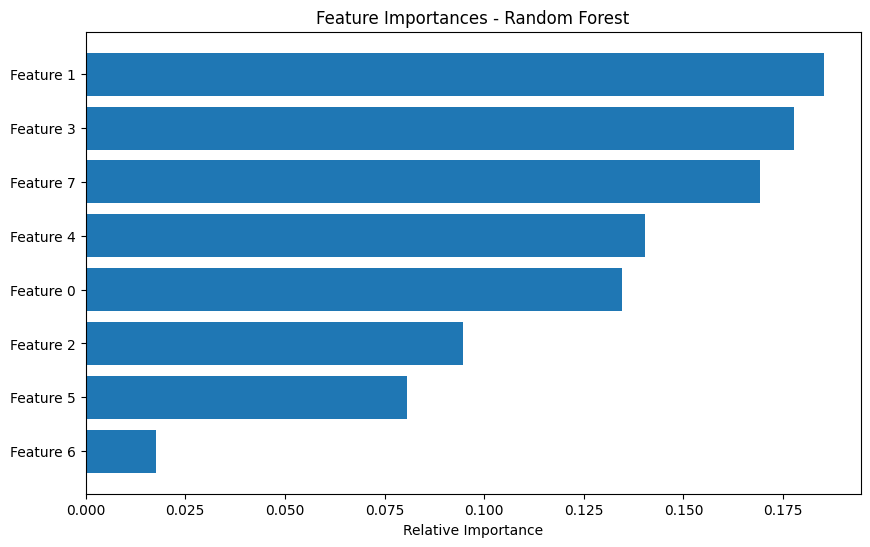

In [49]:
import matplotlib.pyplot as plt

# Plot feature importances for Random Forest
rf_model = rf_grid_search.best_estimator_
importances = rf_model.feature_importances_
indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.title("Feature Importances - Random Forest")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [f"Feature {i}" for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [50]:
# Step 3: Cross-Validation for Best Models
rf_best_model = rf_grid_search.best_estimator_
gb_best_model = gb_grid_search.best_estimator_

# Cross-validation scores for Random Forest
rf_cv_scores = cross_val_score(rf_best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Random Forest Cross-Validation MSE: {-rf_cv_scores.mean():.2f} ± {rf_cv_scores.std():.2f}")

# Cross-validation scores for Gradient Boosting
gb_cv_scores = cross_val_score(gb_best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
print(f"Gradient Boosting Cross-Validation MSE: {-gb_cv_scores.mean():.2f} ± {gb_cv_scores.std():.2f}")


Random Forest Cross-Validation MSE: 226.14 ± 79.94
Gradient Boosting Cross-Validation MSE: 216.20 ± 79.83


In [51]:
# Step 4: Final Model Evaluation and Comparison
# Final Evaluation on Test Set
rf_best_model.fit(X_train, y_train)
gb_best_model.fit(X_train, y_train)

rf_pred = rf_best_model.predict(X_test)
gb_pred = gb_best_model.predict(X_test)

# Evaluate Random Forest
rf_r2 = r2_score(y_test, rf_pred)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = root_mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)

# Evaluate Gradient Boosting
gb_r2 = r2_score(y_test, gb_pred)
gb_mse = mean_squared_error(y_test, gb_pred)
gb_rmse = root_mean_squared_error(y_test, gb_pred)
gb_mae = mean_absolute_error(y_test, gb_pred)

# Print Final Evaluation Results
print("\nRandom Forest Model Final Evaluation:")
print(f"R² Score: {rf_r2:.2f}")
print(f"MSE: {rf_mse:.2f}")
print(f"RMSE: {rf_rmse:.2f}")
print(f"MAE: {rf_mae:.2f}")

print("\nGradient Boosting Model Final Evaluation:")
print(f"R² Score: {gb_r2:.2f}")
print(f"MSE: {gb_mse:.2f}")
print(f"RMSE: {gb_rmse:.2f}")
print(f"MAE: {gb_mae:.2f}")



Random Forest Model Final Evaluation:
R² Score: -0.00
MSE: 159.75
RMSE: 12.64
MAE: 10.52

Gradient Boosting Model Final Evaluation:
R² Score: -0.10
MSE: 175.01
RMSE: 13.23
MAE: 11.42


In [52]:
import pickle

In [59]:
# Save model , encoders and scaler to a separate file
with open('random_forest_agri_model.pkl', 'wb') as f:
    pickle.dump(rf_clf, f)

with open('crop_encoder.pkl', 'wb') as f:
    pickle.dump(crop_encoder, f)

with open('irrigation_encoder.pkl', 'wb') as f:
    pickle.dump(irrigation_encoder, f)

with open('soil_encoder.pkl', 'wb') as f:
    pickle.dump(soil_encoder, f)

with open('season_encoder.pkl', 'wb') as f:
    pickle.dump(season_encoder, f)

with open('scaler_agri.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Save the list of column names after one-hot encoding
with open("columns_order_agri.pkl", "wb") as f:
    pickle.dump(list(X.columns), f)

In [54]:
print(list(X.columns))

['Crop_Type', 'Farm_Area(acres)', 'Irrigation_Type', 'Fertilizer_Used(tons)', 'Pesticide_Used(kg)', 'Soil_Type', 'Season', 'Water_Usage(cubic meters)']
